# Village consumption smoothing 

A simple simulation of a village sharing economy.  We simulate $T$ periods of income for $N$ individuals.  Each individual receives a base level of income plus an stochastic income component.  The income shocks can be independent or correlated.  

We plot income in each household with and without consumption smoothing. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, FloatSlider

#### Default parameters

In [2]:
rho = 0   
N = 5
T = 15
V = 2

If there are $N=5$ households they have base income of $[10, 15, 20, 25, 30]$, respectively.  To this base income we add a mean zero normally distributed shock with with covariance  $\rho$

In [3]:
def shocks(rho=0, N=N, T=T):
    '''Returns an N by T matrix of multivariate normally distributed shocks with correlation rho'''
    mean = np.zeros(N)
    cov = np.ones((N, N), int)*rho*V
    np.fill_diagonal(cov, V)
    #print(cov)
    e = np.random.multivariate_normal(mean, cov, size=T)
    return e

In [4]:
def incomes(rho=0, V=V, N = N, T=T):
    '''Generates random incomes for N over T periods'''
    t = np.arange(T)   # time periods
    x0 = np.arange(10,10+N*5,5)   # average income
    e = shocks(rho=rho, N=N, T=T)*V
    X = x0 + e
    
    XT = np.sum(X, axis = 1)
    
    w = x0/np.sum(x0)
    XS = np.array([XT * wt for wt in w]).T
    
    return t, X, XS

In [5]:
def plot_cons(rho=0, V=1):
    #print('rho = {}'.format(rho))
    t, X, XS = incomes(rho=rho, V=V, N=N, T=T)
    fig, ax = plt.subplots(figsize=(9,7))
    ax.plot(t, X,'x-')
    ax.plot(t,XS,linestyle='dashed')
    ax.set_xlabel('time')
    ax.set_xticks(np.arange(T, step=1))
    fig.suptitle(r'$\rho = {:0.2f}$'.format(rho))
    ax.grid()
    plt.tight_layout();

## Examples 

We illustrate with three different scenarios.  Remember that these are random draws so will be different everytime these are run.

### independent incomes

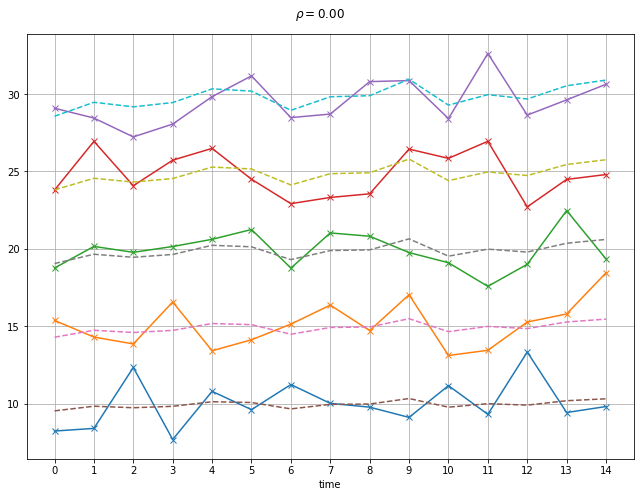

In [6]:
plot_cons(rho=0, V=1)

### Correlated incomes

When incomes are correlated, village incomes tend to move up or down together so there is Less opportunity for risk sharing. Consumption will tend to follow income more closely.

The village as a whole would benefit from the intermediation of outsiders.

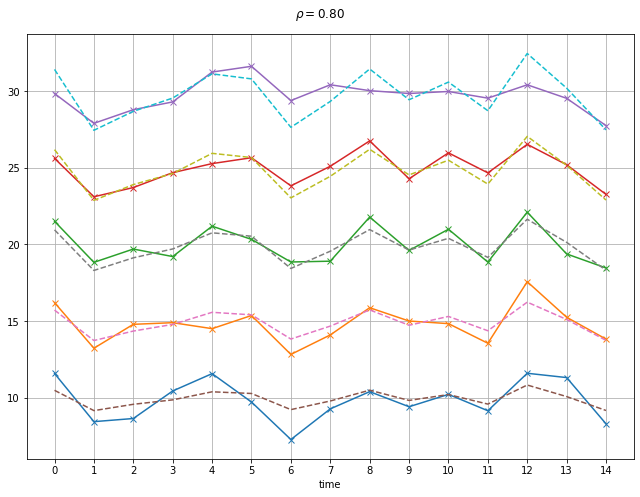

In [7]:
plot_cons(rho=0.8, V=1)

### Negatively correlated incomes

With negative correlation across households, consumption smoothing possibilities increase. 

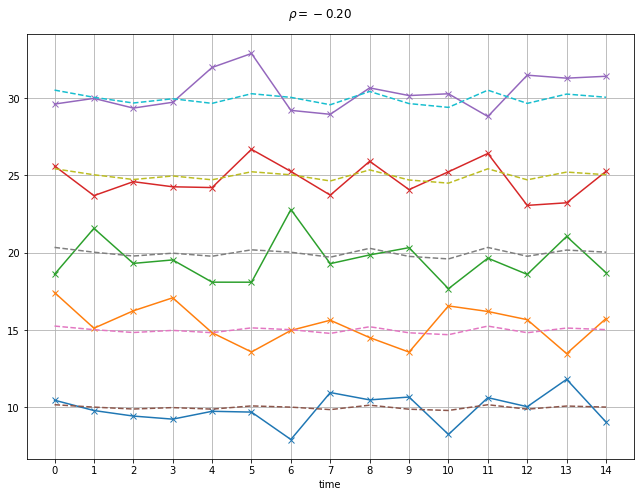

In [8]:
plot_cons(rho=-0.2, V=1)